In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns 
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [12]:
data = load_breast_cancer()

In [13]:
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression()

In [15]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred=model.predict(x_test)

In [19]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [40]:
print(confusion_matrix(y_test,y_pred))

[[40  3]
 [ 1 70]]


In [43]:
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred))
cm_df.columns=['predicted 0','predicted 1']
cm_df= cm_df.rename(index={0:'actual 0',1:'actual 1'})

In [44]:
cm_df

,predicted 0,predicted 1
actual 0,40,3
actual 1,1,70


In [45]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

In [48]:
accuracy_score(y_test,y_pred)

0.9649122807017544

In [49]:
precision_score(y_test,y_pred)

0.958904109589041

In [50]:
recall_score(y_test,y_pred)

0.9859154929577465

In [53]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('f1:',f1_score(y_test,y_pred))

accuracy: 0.9649122807017544
precision: 0.958904109589041
recall: 0.9859154929577465
f1: 0.9722222222222222


In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [56]:
# plotting a confusion matrix with sklearn 
from sklearn.metrics import ConfusionMatrixDisplay

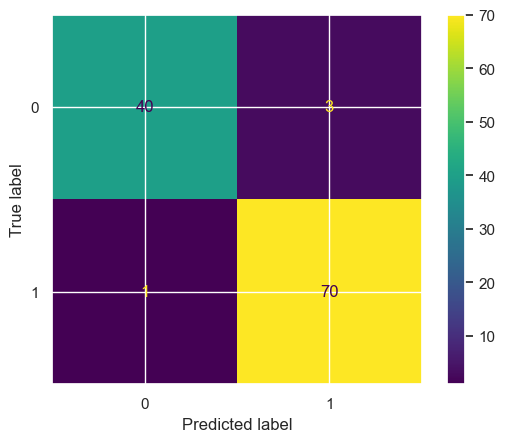

In [57]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()